<a href="https://colab.research.google.com/github/cszafariqbal/CODSOFT/blob/main/Task_4_Sales_Predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Prediction Using Python


*   Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.


#Upload the Dataset into Google Colab

In [1]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


#Import The Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
sales_data = pd.read_csv('advertising.csv')
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#Data Preprocessing & Cleaning

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
sales_data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
sales_data.duplicated().sum()


0

#Data Visualization

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

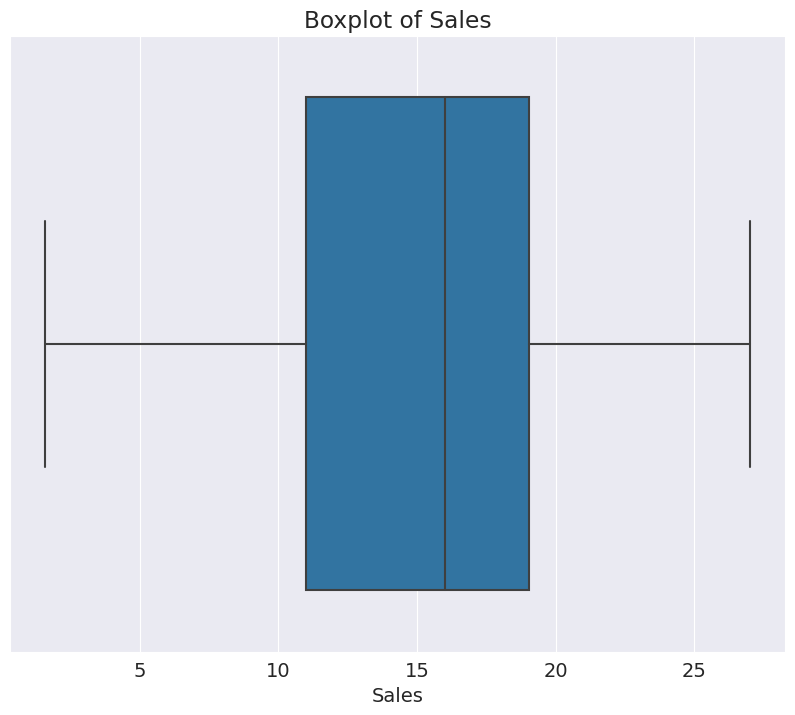

In [9]:
plt.figure( figsize=(10, 8))
sns.boxplot(data = sales_data, x='Sales')
plt.title('Boxplot of Sales')
plt.show()

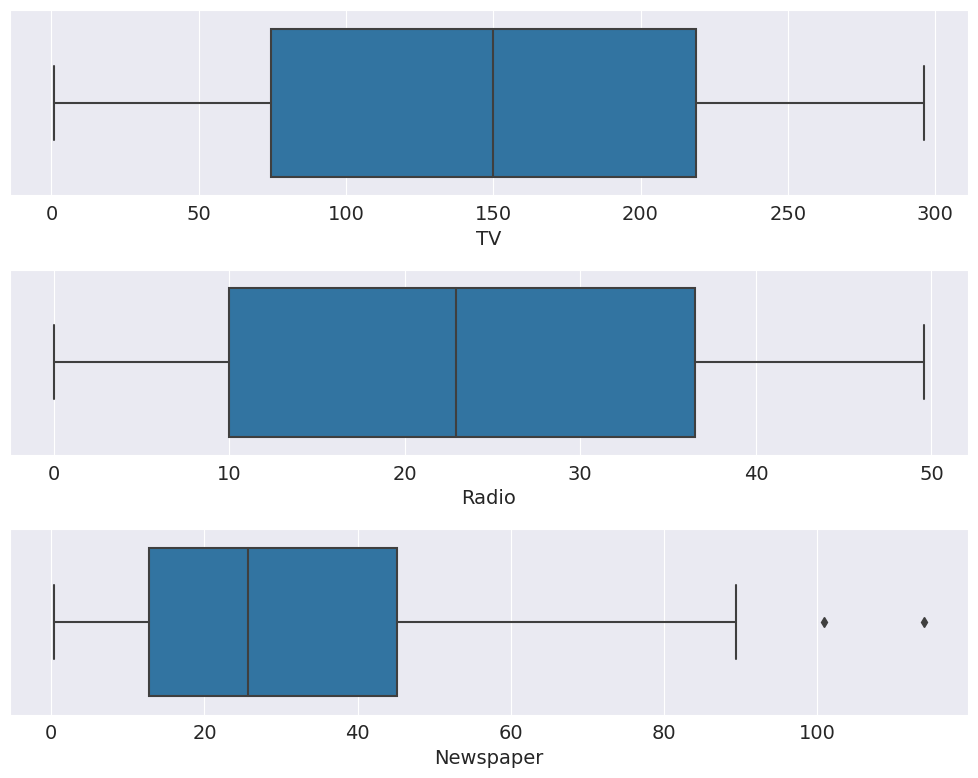

In [10]:
fig, axs = plt.subplots(3, figsize=(10, 8))
ax1 = sns.boxplot(data = sales_data, x='TV', ax=axs[0])
pax2 = sns.boxplot(data = sales_data, x='Radio', ax=axs[1])
ax3 = sns.boxplot(data = sales_data, x='Newspaper', ax=axs[2])
plt.tight_layout()

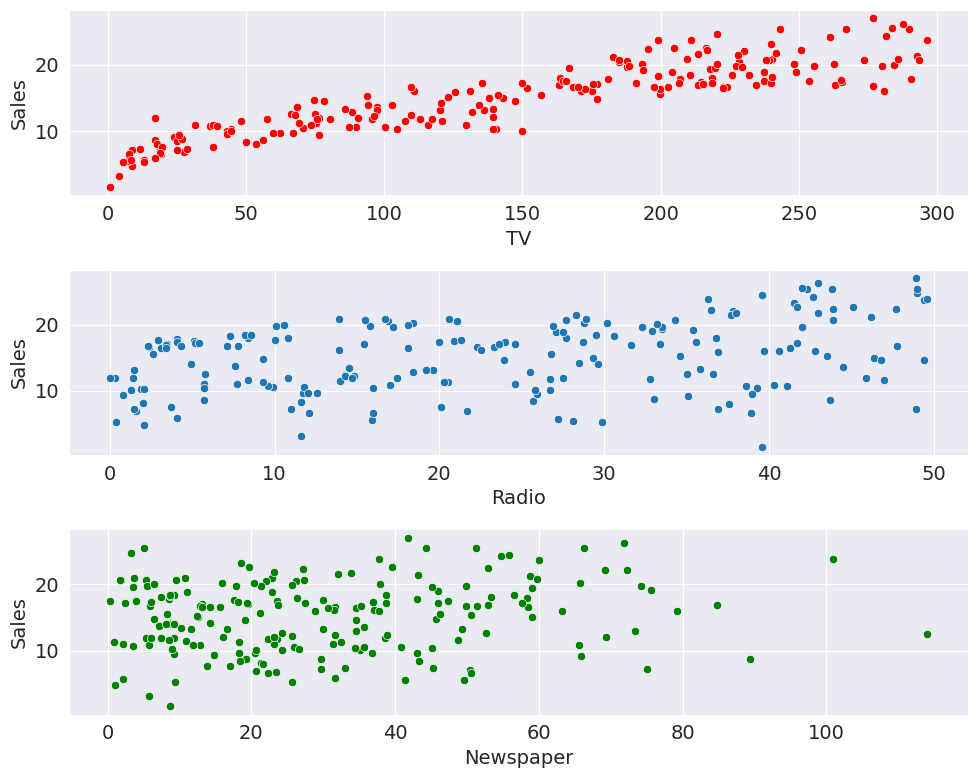

In [21]:
from matplotlib import colors
fig, axs = plt.subplots(3, figsize=(10, 8))
ax1 = sns.scatterplot(data = sales_data, x='TV', y='Sales', ax=axs[0], color='red')
ax2 = sns.scatterplot(data = sales_data, x='Radio', y='Sales', ax=axs[1])
ax3 = sns.scatterplot(data = sales_data, x='Newspaper', y='Sales', ax=axs[2], color='green')
plt.tight_layout()
plt.show()

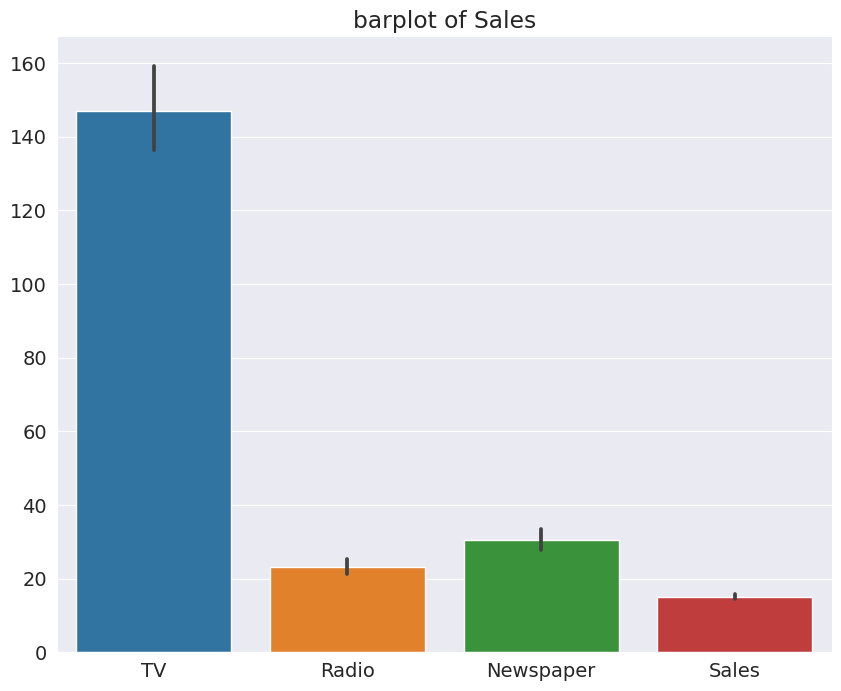

In [58]:
plt.figure( figsize=(10, 8))
sns.barplot(data=sales_data)
plt.title('barplot of Sales')
plt.show()

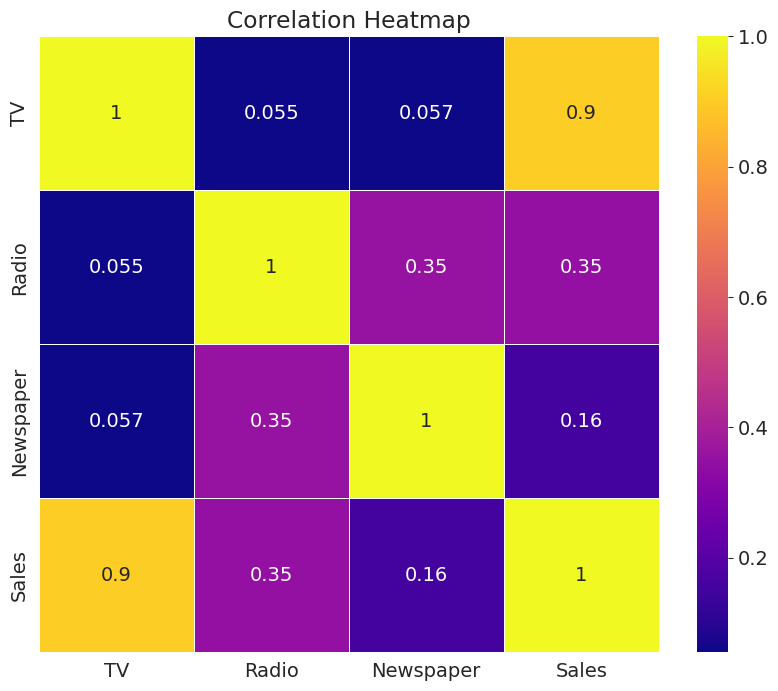

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(sales_data.corr(), annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Seprate inputs and target from columns'dataset

In [23]:
inputs_data = sales_data[sales_data.columns[:-1]]
target = sales_data['Sales']

#Split Dataset into Train and Test dataset

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_data, target, test_size=0.2, random_state=5)

In [25]:
print('shape of x_train', x_train.shape)
print('shape of y_train', y_train.shape)
print('shape of x_test', x_test.shape)
print('shape of y_test', y_test.shape)

shape of x_train (160, 3)
shape of y_train (160,)
shape of x_test (40, 3)
shape of y_test (40,)


#Train the Linear Reggression Model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

#Evalution of Model on test dataset

In [30]:
preds = linear_model.predict(x_test)

#Accuracy of Model

In [31]:
print("Model: Linear Regression")
print("Accuracy = {:0.2f}%".format(score(y_test, preds)*100))
print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_test, preds, squared=False)))


Model: Linear Regression
Accuracy = 92.18%
Mean Squared Error = 1.37



#Train the RandomForestReggression Model

In [40]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=200, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)


#Accuracy of Model on test dataset


In [41]:
print("Model: RandomForestRegressor")
print("Accuracy = {:0.2f}%".format(score(y_test, rf_preds)*100))
print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_test, rf_preds, squared=False)))


Model: RandomForestRegressor
Accuracy = 96.05%
Mean Squared Error = 0.97



#Predict the Sales of Products by using new Inputs

In [59]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    pred = RFR.predict(input_df)
    return pred

In [63]:
sales_data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [66]:
new_input = {'TV': 230.1,
             'Radio': 37.8,
             'Newspaper': 69.2
        }

In [67]:
predict_input(new_input)

array([21.8465])

In [68]:
new_input = {'TV': 250.1,
             'Radio': 87.8,
             'Newspaper': 39.2
        }

In [69]:
predict_input(new_input)

array([25.099])